<a href="https://colab.research.google.com/github/Sanjay05-coder/Multiple-Linear-Regression-using-student-perfomance-dataset-/blob/main/Multiple_Linear_Regression_(Own)(Student_perfomance).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Research Goal
To analyze whether how much a student’s past performance and their practice habits contribute to their current performance.

## note :
y: is what we are predicting . like what is the main outcome or results


x: These are the factors or features you think influence Y.
They are used to make predictions about Y.

In [43]:
#data analysis
import pandas as pd
import numpy as np

# machine learning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# for ploting and visualizing
import matplotlib.pyplot as plt

In [44]:
student=pd.read_csv('/content/Student_Performance.csv')

student.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [45]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [46]:
student=student[["Performance Index","Previous Scores","Sample Question Papers Practiced"]]
student.head()

,Performance Index,Previous Scores,Sample Question Papers Practiced
0,91.0,99,1
1,65.0,82,2
2,45.0,51,2
3,36.0,52,2
4,66.0,75,5


In [47]:
X=student[["Sample Question Papers Practiced","Previous Scores"]]
y=student["Performance Index"]

Train Test Split
since smaller dataset will split to 20

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [49]:
model=LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [50]:
# visualizing model against actual dataset
# basically y test vs y predict
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



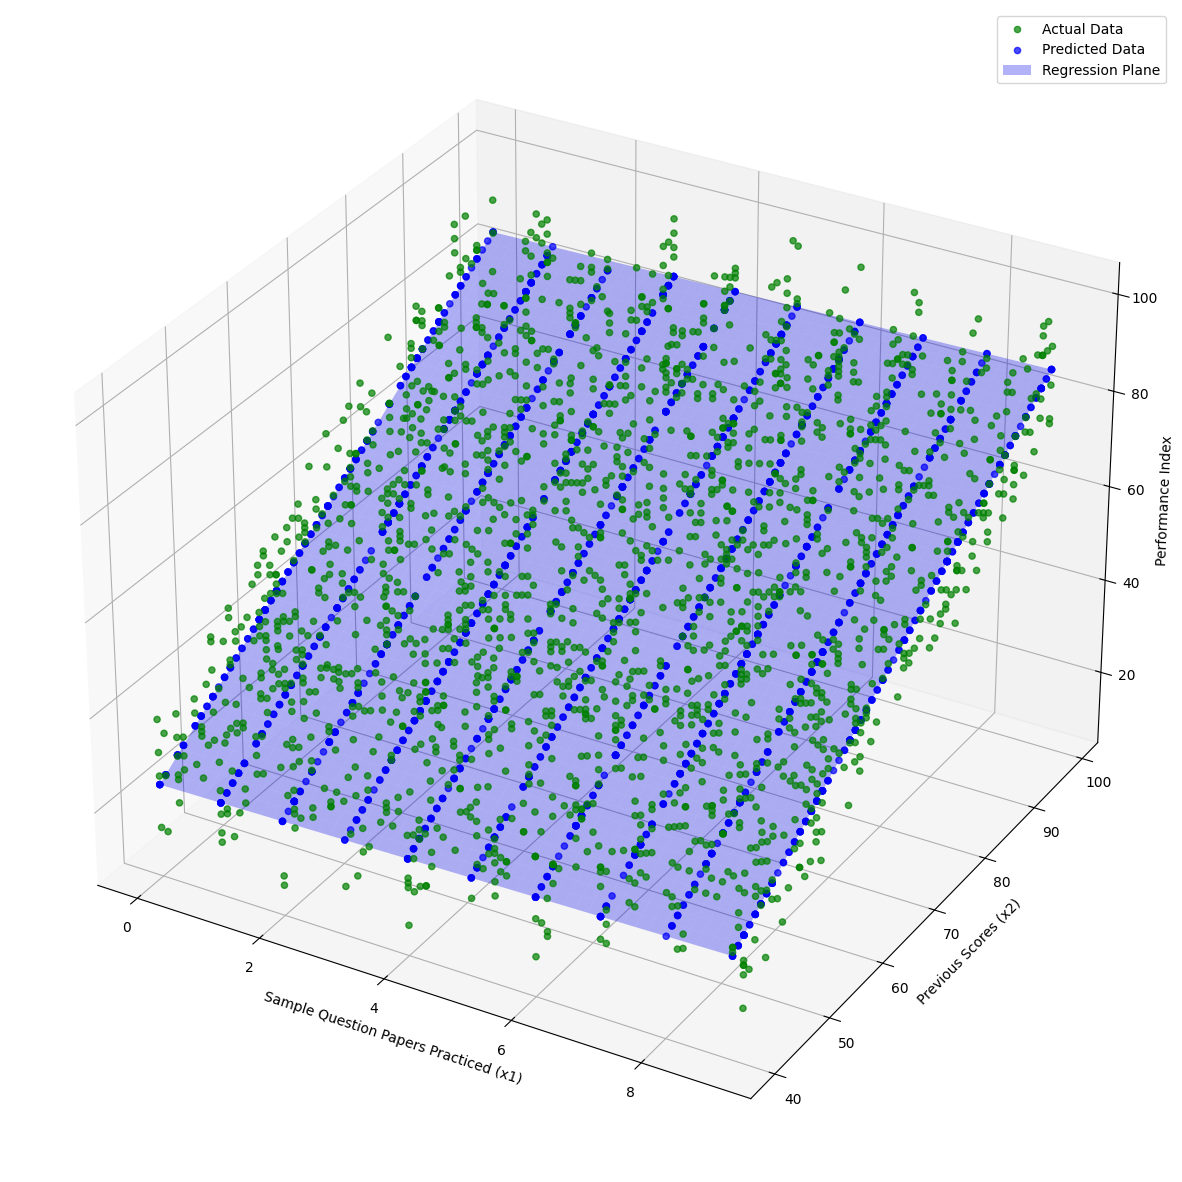

In [51]:
x1=X_test["Sample Question Papers Practiced"]
x2=X_test["Previous Scores"]
y_actual=y_test
y_pred=model.predict(X_test)

#create a 3d plot

fig=plt.figure(figsize=(15,20))
ax=fig.add_subplot(111,projection='3d')

# Plot actual test data
ax.scatter(x1, x2, y_actual, color='g', alpha=0.7, label="Actual Data")

# Plot predicted data
ax.scatter(x1, x2, y_pred, color='b', alpha=0.7, label="Predicted Data")

# Create a grid for the regression plane
x1_range = np.linspace(x1.min(), x1.max(), 50)  # Grid for x1 Sample Question Papers Practiced
x2_range = np.linspace(x2.min(), x2.max(), 50)  # Grid for x2 Previous Scores
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)  # Create a 2D grid

# Flatten the grid and predict the corresponding y values
x_grid_flattened = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_grid_pred = model.predict(x_grid_flattened).reshape(x1_grid.shape)

# Plot the regression plane
ax.plot_surface(x1_grid, x2_grid, y_grid_pred, color='blue', alpha=0.3, label="Regression Plane")

# adding labels

ax.set_xlabel("Sample Question Papers Practiced (x1)")
ax.set_ylabel("Previous Scores (x2)")
ax.set_zlabel("Performance Index")
ax.legend()

plt.show()



In [52]:
import plotly.graph_objects as go
import numpy as np

# Assuming you already have: x1, x2, y_actual, y_pred, model

# Create a scatter plot for actual data points
scatter_actual = go.Scatter3d(
    x=x1, y=x2, z=y_actual,
    mode='markers',
    marker=dict(color='green', size=5),
    name="Actual Data"
)

# Create a scatter plot for predicted data points
scatter_pred = go.Scatter3d(
    x=x1, y=x2, z=y_pred,
    mode='markers',
    marker=dict(color='blue', size=5),
    name="Predicted Data"
)

# Create a grid for the regression plane
x1_range = np.linspace(x1.min(), x1.max(), 50)
x2_range = np.linspace(x2.min(), x2.max(), 50)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Flatten and predict
x_grid_flattened = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_grid_pred = model.predict(x_grid_flattened).reshape(x1_grid.shape)

# Create the regression plane
surface = go.Surface(
    x=x1_grid, y=x2_grid, z=y_grid_pred,
    colorscale='reds', opacity=0.5, showscale=False,
    name="Regression Plane"
)

# Create the layout
layout = go.Layout(
    scene=dict(
        xaxis_title="Sample Question Papers Practiced (x1)",
        yaxis_title="Previous Scores (x2)",
        zaxis_title="Performance Index"
    ),
    title="3D Linear Regression : Actual vs Predicted with regresssion plane "
)

# Combine everything into a figure
fig = go.Figure(data=[scatter_actual, scatter_pred, surface], layout=layout)

# Show interactive plot
fig.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [53]:

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R² Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')


R² Score: 0.8280
Mean Squared Error: 59.1801


###Conclusion
The multiple linear regression model was developed to predict students' Performance Index using Previous Scores and Sample Question Papers Practiced as predictors. The model achieved an R² score of 0.8289, indicating that approximately 82.89% of the variation in performance can be explained by these two factors. This suggests a strong linear relationship between the predictors and the performance outcome.

The Mean Squared Error (MSE) of 59.1801 reflects a reasonably low average error in predictions, supporting the model’s reliability.

The 3D visualization further confirms the model’s effectiveness, showing that the predicted values (y′) closely align with the actual performance values (y) across different levels of internet usage and written paper practice. The clustering of data points near the regression surface indicates a good fit.